## Visualizing Tech Stocks

In this project I will analyze and visualize the top 5 highest valued technology stocks and how they have performed so far in 2023:
* Microsoft (NASDAQ:MSFT)
* Amazon (NASDAQ:AMZN)
* Apple (NASDAQ:AAPL)
* Alphabet (NASDAQ:GOOG)
* Facebook (NASDAQ:FB).

Using Pandas, Pandas-Datarader, yfinance, and Matplotlib, I will take a visual look into the similarities and differences between these stocks from January through May 2023. My analysis will involve the following:
1. Visualize the stock prices using matplotlib
2. Calculate and visualize the daily simple rate of return 
3. Calculate and visualize the mean rates of return
4. Calculate and visualize the variances of the returns
5. Calculate and visualize the standard deviations of the returns
6. Write a short thesis based on the correlations between the tech stocks

### 1. Import Packages

In [2]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf

### 2. Load the adjusted closings for the top 5 tech stocks.

In [4]:
symbols = ["MSFT", "AMZN", "AAPL", "GOOG", "META"]  # List of stock symbols
start_date = "2023-01-01"
end_date = "2023-05-01"

stock_data = yf.download(symbols, start=start_date, end=end_date)


[*********************100%***********************]  5 of 5 completed


In [5]:
stock_data

Adj Close                                                  \
                  AAPL        AMZN        GOOG        META        MSFT   
Date                                                                     
2023-01-03  124.879326   85.820000   89.699997  124.739998  238.981430   
2023-01-04  126.167366   85.139999   88.709999  127.370003  228.527618   
2023-01-05  124.829399   83.120003   86.769997  126.940002  221.754562   
2023-01-06  129.422394   86.080002   88.160004  130.020004  224.368011   
2023-01-09  129.951584   87.360001   88.800003  129.470001  226.552551   
...                ...         ...         ...         ...         ...   
2023-04-24  165.330002  106.209999  106.779999  212.789993  281.769989   
2023-04-25  163.770004  102.570000  104.610001  207.550003  275.420013   
2023-04-26  163.759995  104.980003  104.449997  209.399994  295.369995   
2023-04-27  168.410004  109.820000  108.370003  238.559998  304.829987   
2023-04-28  169.679993  105.449997  108.220001  240.320007  307.260010   

                 Close                                                  ...  \
                  AAPL        AMZN        GOOG        META        MSFT  ...   
Date                                                                    ...   
2023-01-03  125.070000   85.820000   89.699997  124.739998  239.580002  ...   
2023-01-04  126.360001   85.139999   88.709999  127.370003  229.100006  ...   
2023-01-05  125.019997   83.120003   86.769997  126.940002  222.309998  ...   
2023-01-06  129.619995   86.080002   88.160004  130.020004  224.929993  ...   
2023-01-09  130.149994   87.360001   88.800003  129.470001  227.119995  ...   
...                ...         ...         ...         ...         ...  ...   
2023-04-24  165.330002  106.209999  106.779999  212.789993  281.769989  ...   
2023-04-25  163.770004  102.570000  104.610001  207.550003  275.420013  ...   
2023-04-26  163.759995  104.980003  104.449997  209.399994  295.369995  ...   
2023-04-27  168.410004  109.820000  108.370003  238.559998  304.829987  ...   
2023-04-28  169.679993  105.449997  108.220001  240.320007  307.260010  ...   

                  Open                                                  \
                  AAPL        AMZN        GOOG        META        MSFT   
Date                                                                     
2023-01-03  130.279999   85.459999   89.830002  122.820000  243.080002   
2023-01-04  126.889999   86.550003   91.010002  127.379997  232.279999   
2023-01-05  127.129997   85.330002   88.070000  126.129997  227.199997   
2023-01-06  126.010002   83.029999   87.360001  128.970001  223.000000   
2023-01-09  130.470001   87.459999   89.195000  131.160004  226.449997   
...                ...         ...         ...         ...         ...   
2023-04-24  165.000000  107.660004  106.050003  213.679993  282.089996   
2023-04-25  165.190002  104.910004  106.610001  210.820007  279.510010   
2023-04-26  163.059998  105.040001  105.559998  212.500000  296.700012   
2023-04-27  165.190002  108.160004  105.230003  239.889999  295.970001   
2023-04-28  168.490005  107.730003  107.800003  239.009995  304.010010   

               Volume                                           
                 AAPL       AMZN      GOOG      META      MSFT  
Date                                                            
2023-01-03  112117500   76706000  20738500  35528500  25740000  
2023-01-04   89113600   68885100  27046500  32397100  50623400  
2023-01-05   80962700   67930800  23136100  25447100  39585600  
2023-01-06   87754700   83303400  26612600  27584500  43613600  
2023-01-09   70790800   65266100  22996700  26649100  27369800  
...               ...        ...       ...       ...       ...  
2023-04-24   41949600   69575600  21410900  15750900  26611000  
2023-04-25   48714100   65026800  31408100  19198200  45772200  
2023-04-26   45498800   73803800  37068200  41992700  64599200  
2023-04-27   64902300  149961200  38235200  71196500

In [6]:
stock_data['Adj Close']

,AAPL,AMZN,GOOG,META,MSFT
Date,,,,,
2023-01-03,124.879326,85.820000,89.699997,124.739998,238.981430
2023-01-04,126.167366,85.139999,88.709999,127.370003,228.527618
2023-01-05,124.829399,83.120003,86.769997,126.940002,221.754562
2023-01-06,129.422394,86.080002,88.160004,130.020004,224.368011
2023-01-09,129.951584,87.360001,88.800003,129.470001,226.552551
...,...,...,...,...,...
2023-04-24,165.330002,106.209999,106.779999,212.789993,281.769989
2023-04-25,163.770004,102.570000,104.610001,207.550003,275.420013
2023-04-26,163.759995,104.980003,104.449997,209.399994,295.369995


### 3. Plot the adjusted closing prices over time.

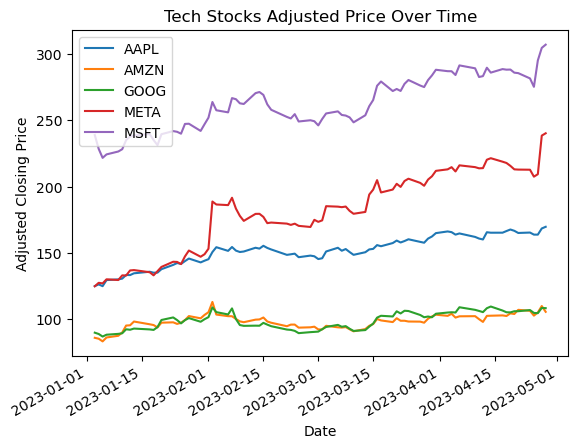

In [7]:
stock_data_closing_prices = stock_data['Adj Close']
stock_data_closing_prices.plot()
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.title("Tech Stocks Adjusted Price Over Time")
plt.show()

### 4. Calculate and plot the daily simple rate of return over time. 

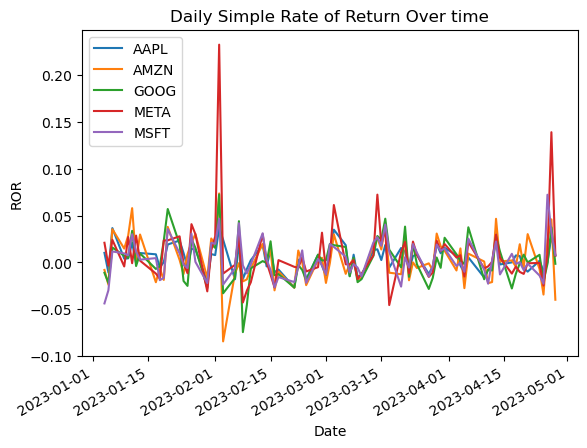

<Figure size 1600x900 with 0 Axes>

In [8]:
stock_data_daily_returns = stock_data['Adj Close'].pct_change()
stock_data_daily_returns.plot()
plt.xlabel("Date")
plt.ylabel("ROR")
plt.title("Daily Simple Rate of Return Over time")
plt.figure(figsize=(16,9))
plt.show()

### 5. Create subplots of daily simple rate of return.

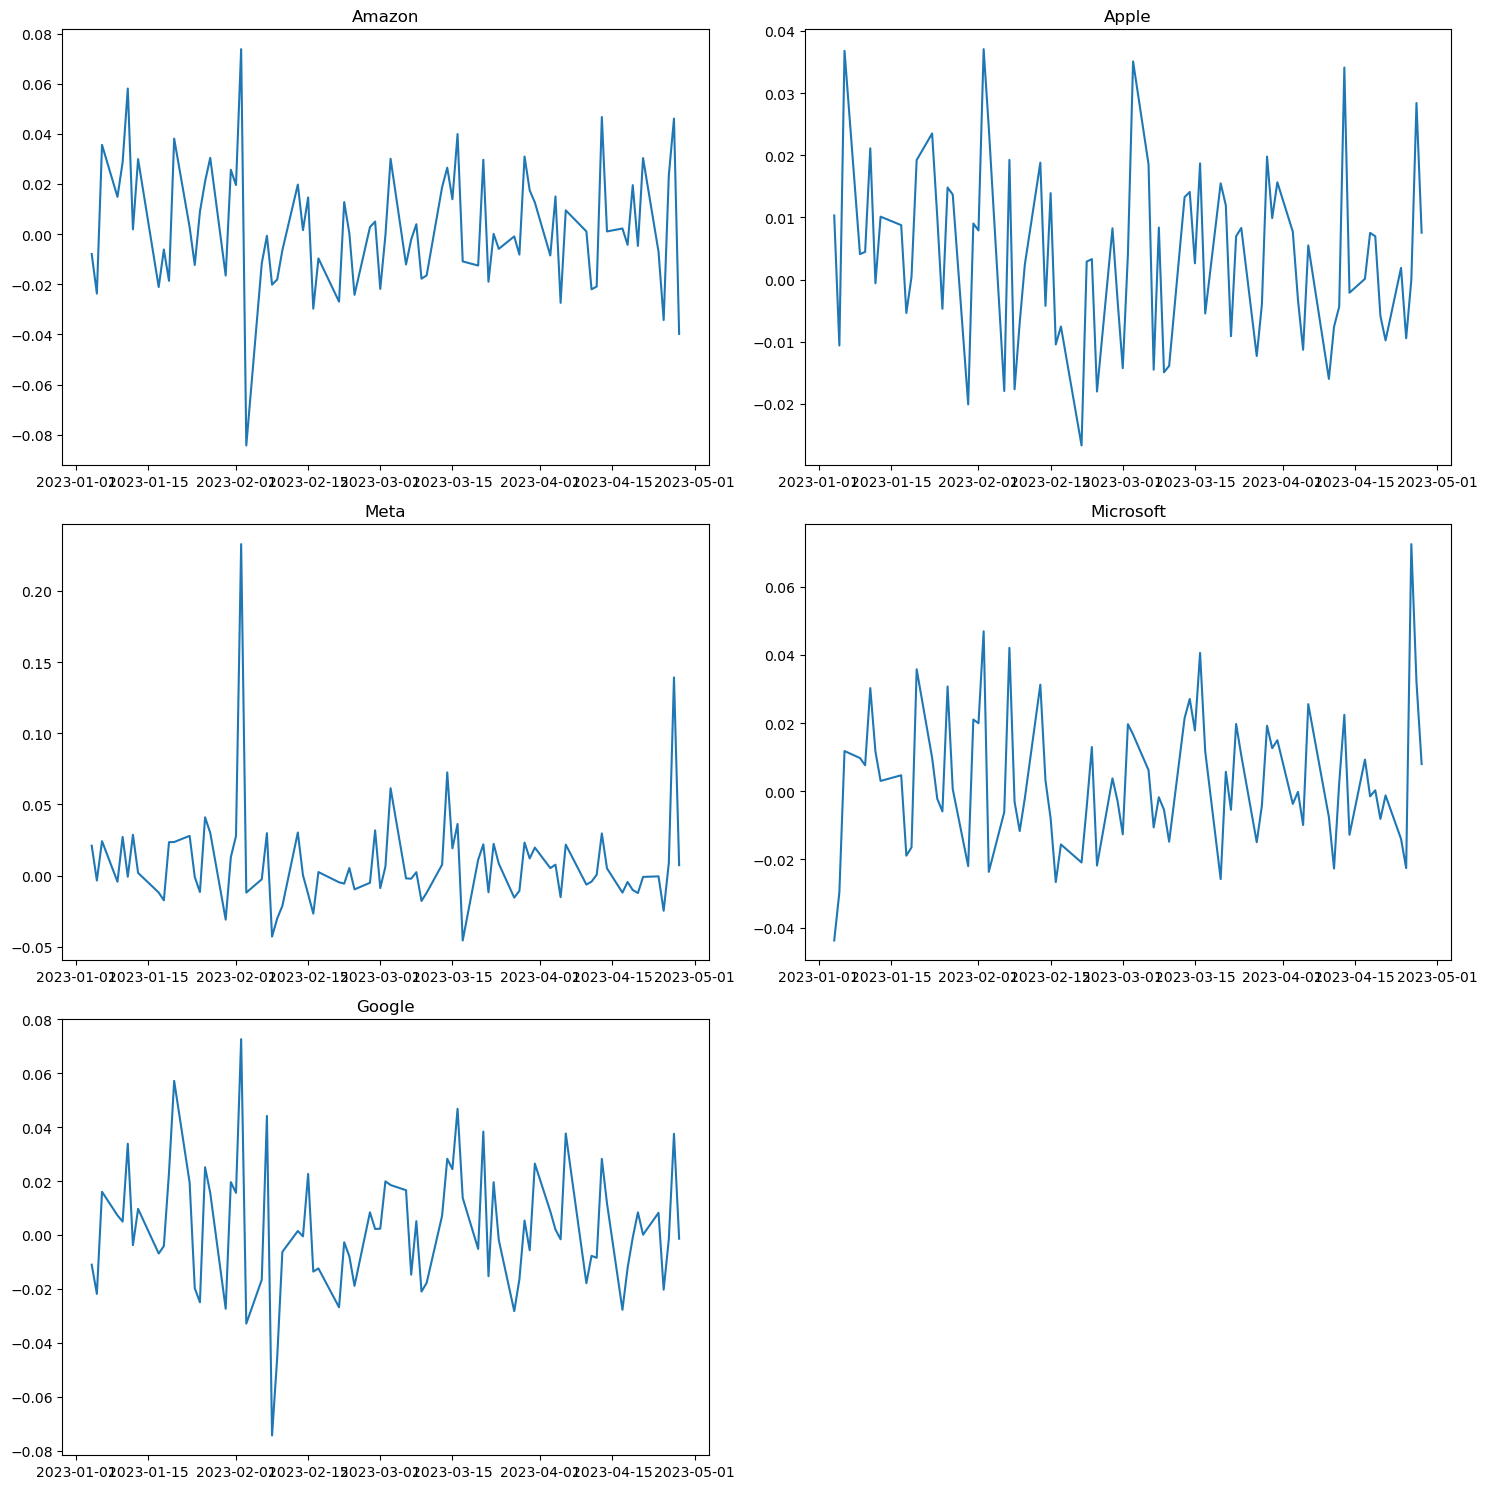

In [9]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax1.plot(stock_data['Adj Close']['AMZN'].pct_change())
ax1.set_title("Amazon")
ax2.plot(stock_data['Adj Close']['AAPL'].pct_change())
ax2.set_title("Apple")
ax3.plot(stock_data['Adj Close']['META'].pct_change())
ax3.set_title("Meta")
ax4.plot(stock_data['Adj Close']['MSFT'].pct_change())
ax4.set_title("Microsoft")
ax5.plot(stock_data['Adj Close']['GOOG'].pct_change())
ax5.set_title("Google")
plt.tight_layout()
plt.show()

### 6. Calculate and plot the mean of each tech stock's daily simple rate of return

In [10]:
# calculate daily mean
daily_mean = stock_data_daily_returns.mean()

daily_mean

AAPL    0.003936
AMZN    0.002874
GOOG    0.002617
META    0.008823
MSFT    0.003340
dtype: float64

In [11]:
# daily mean index for the x axis
daily_mean.keys()

Index(['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT'], dtype='object')

In [12]:
# grab each daily mean value for the y axis
height = []
for key in daily_mean.keys():
    height.append(daily_mean[key])
height

[0.003936118311767498,
 0.002874158167050765,
 0.0026171684064865363,
 0.008823152456545282,
 0.003340199480756334]

In [13]:
# arrange keys on x axis based on length
x_pos = np.arange(len(daily_mean.keys()))
x_pos

array([0, 1, 2, 3, 4])

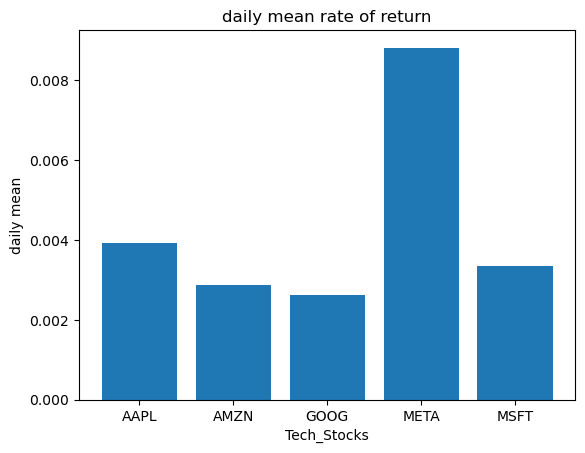

In [15]:
# plot bars
plt.bar(x_pos, height)
 
# create names on the x-axis
plt.xticks(x_pos, daily_mean.keys())

# label chart
plt.xlabel("Tech_Stocks")
plt.ylabel("daily mean")
plt.title("daily mean rate of return")

# show graphic
plt.show()

Meta has the highest mean simple rate of return over the period of data collected. Thus Meta would have been a good choice for investment over this period of time. Google, on the other hand, has the lowest mean simple rate of return over the period.

### 7. Calculate and plot the variance.

In [16]:
# calculate variance
daily_var = stock_data_daily_returns.var()
daily_var

AAPL    0.000197
AMZN    0.000600
GOOG    0.000545
META    0.001307
MSFT    0.000397
dtype: float64

In [17]:
# variance index for the x axis
daily_var.keys()

Index(['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT'], dtype='object')

In [18]:
# grab each variance value for the y axis
height = []
for key in daily_var.keys():
    height.append(daily_var[key])
height

[0.00019704488001283648,
 0.0006002578464632652,
 0.0005447886177133577,
 0.0013073606681791173,
 0.00039673303520028656]

In [19]:
# arrange keys on x axis based on length
x_pos = np.arange(len(daily_var.keys()))
x_pos

array([0, 1, 2, 3, 4])

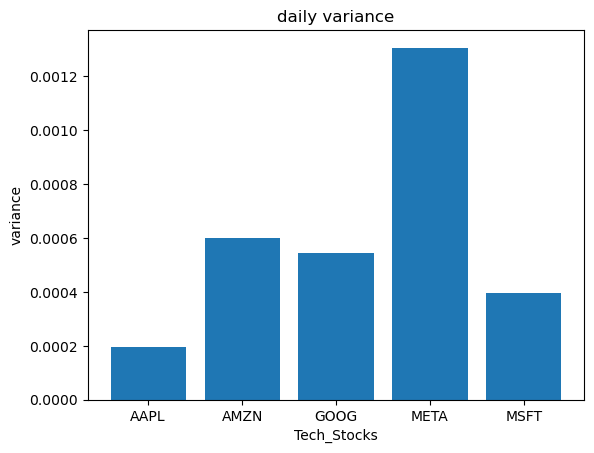

In [20]:
# plot bars
plt.bar(x_pos, height)
 
# create names on the x-axis
plt.xticks(x_pos, daily_var.keys())

# label chart
plt.xlabel("Tech_Stocks")
plt.ylabel("variance")
plt.title("daily variance")

# show graphic
plt.show()

Meta shows the highest variance of all the stocks, indicating it can be a riskier investment. Apple shows the lowest variance, indicating that the returns are more predictable. This goes along with the typical understanding of higher return, high risks stocks, and lower return, low risk stocks.

### 8. Calculate and plot the standard deviation

In [21]:
# calculate standard deviation
daily_std = stock_data_daily_returns.std()
daily_std

AAPL    0.014037
AMZN    0.024500
GOOG    0.023341
META    0.036157
MSFT    0.019918
dtype: float64

In [22]:
# standard deviation index for the x axis
daily_var.keys()

Index(['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT'], dtype='object')

In [23]:
# grab each standard deviation value for the y axis
height = []
for key in daily_std.keys():
    height.append(daily_std[key])
height

[0.014037267540829892,
 0.024500160131380067,
 0.023340707309620196,
 0.036157442777098016,
 0.019918158428938317]

In [24]:
# arrange keys on x axis based on length
x_pos = np.arange(len(daily_std.keys()))
x_pos

array([0, 1, 2, 3, 4])

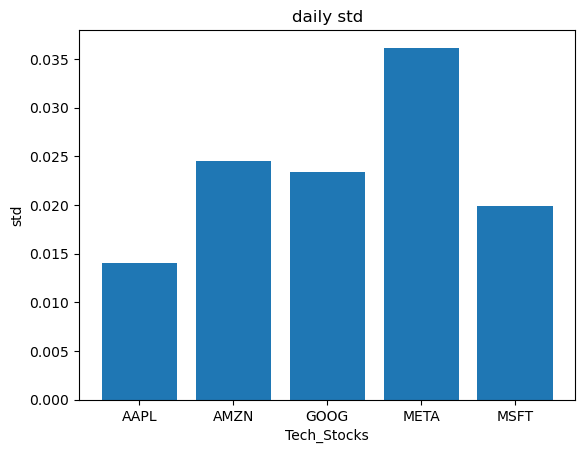

In [25]:
# plot bars
plt.bar(x_pos, height)
 
# create names on the x-axis
plt.xticks(x_pos, daily_std.keys())

# label chart
plt.xlabel("Tech_Stocks")
plt.ylabel("std")
plt.title("daily std")

# show graphic
plt.show()

The answer to this question depends on your investment preferences. Meta is the most volatile stock, as it has the largest standard deviation. Meta, however, has the largest mean return. If you are a more risky investor, this could be your stock of choice. Apple, on the other hand, is the least volatile stock, but has the second highest mean return meaning it could be a safer option.

### 9. Calculate the correlations

In [28]:
stock_data_daily_returns.corr()

,AAPL,AMZN,GOOG,META,MSFT
AAPL,1.000000,0.567037,0.670676,0.614791,0.568322
AMZN,0.567037,1.000000,0.673393,0.612288,0.677415
GOOG,0.670676,0.673393,1.000000,0.660603,0.638084
META,0.614791,0.612288,0.660603,1.000000,0.529784
MSFT,0.568322,0.677415,0.638084,0.529784,1.000000


So far this year, the stocks that are positively correlated are AAPL, AMZN, GOOG, and META. The correlation between META and MSFT suggests a weaker correlation compared to other pairs.